##Author : Braham Parkash

##Data Science & Business Analytics Internship



##GRIP - The Spark Foundation
##TASK 6 - Prediction using Decision Tree Algorithm
##Objective :Create Decision Tree classifier on IRIS dataset and visualize it graphically.
#The purpose is if we feed any new data to this classifier, it would be able to *predict* the right class accordingly.
● Dataset : https://bit.ly/3kXTdox

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df=load_iris()

In [ ]:
data=pd.DataFrame(df.data,columns=df.feature_names)
data['target']=df.target

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data.duplicated().sum()

1

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0


Spliting data into Training and Test sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data[df.feature_names], data['target'], random_state = 0)

## Modeling the pattern


In [ ]:

#Make an instance of the model
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

In [ ]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
y_pred

array([1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1])


Visualize Decision Tree

[Text(133.92000000000002, 181.2, 'X[3] <= 0.75\ngini = 0.666\nsamples = 111\nvalue = [36, 36, 39]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.499\nsamples = 75\nvalue = [0, 36, 39]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.145\nsamples = 38\nvalue = [0, 35, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

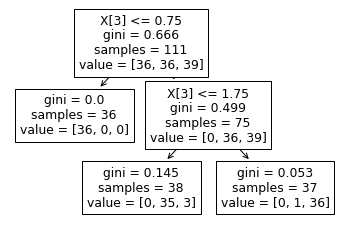

In [ ]:
tree.plot_tree(clf)

In [ ]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
classes = ['setosa', 'versicolor', 'verginica']

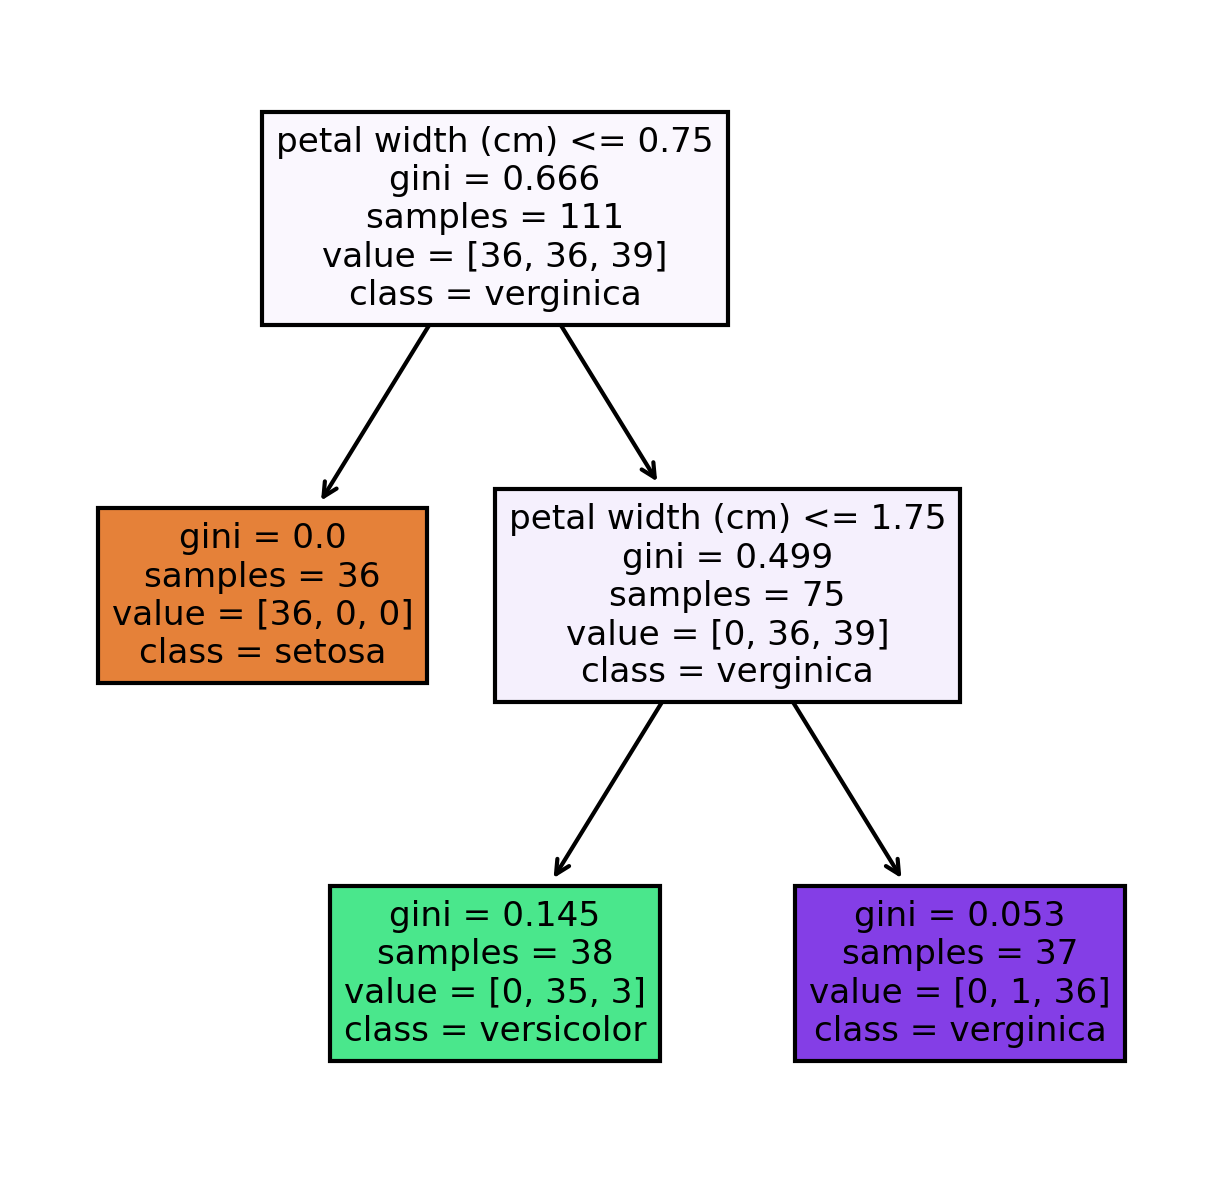

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,5),dpi=300)
tree.plot_tree(clf,feature_names=features,class_names=classes,ax=ax,filled=True)
plt.show()

In [ ]:
fig.savefig('iris_tree.png')

## Type 2 Visualize A Decision Tree

In [ ]:
text_representation=tree.export_text(clf)
text_representation

'|--- feature_3 <= 0.75\n|   |--- class: 0\n|--- feature_3 >  0.75\n|   |--- feature_3 <= 1.75\n|   |   |--- class: 1\n|   |--- feature_3 >  1.75\n|   |   |--- class: 2\n'

In [ ]:
# writing content to a file
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

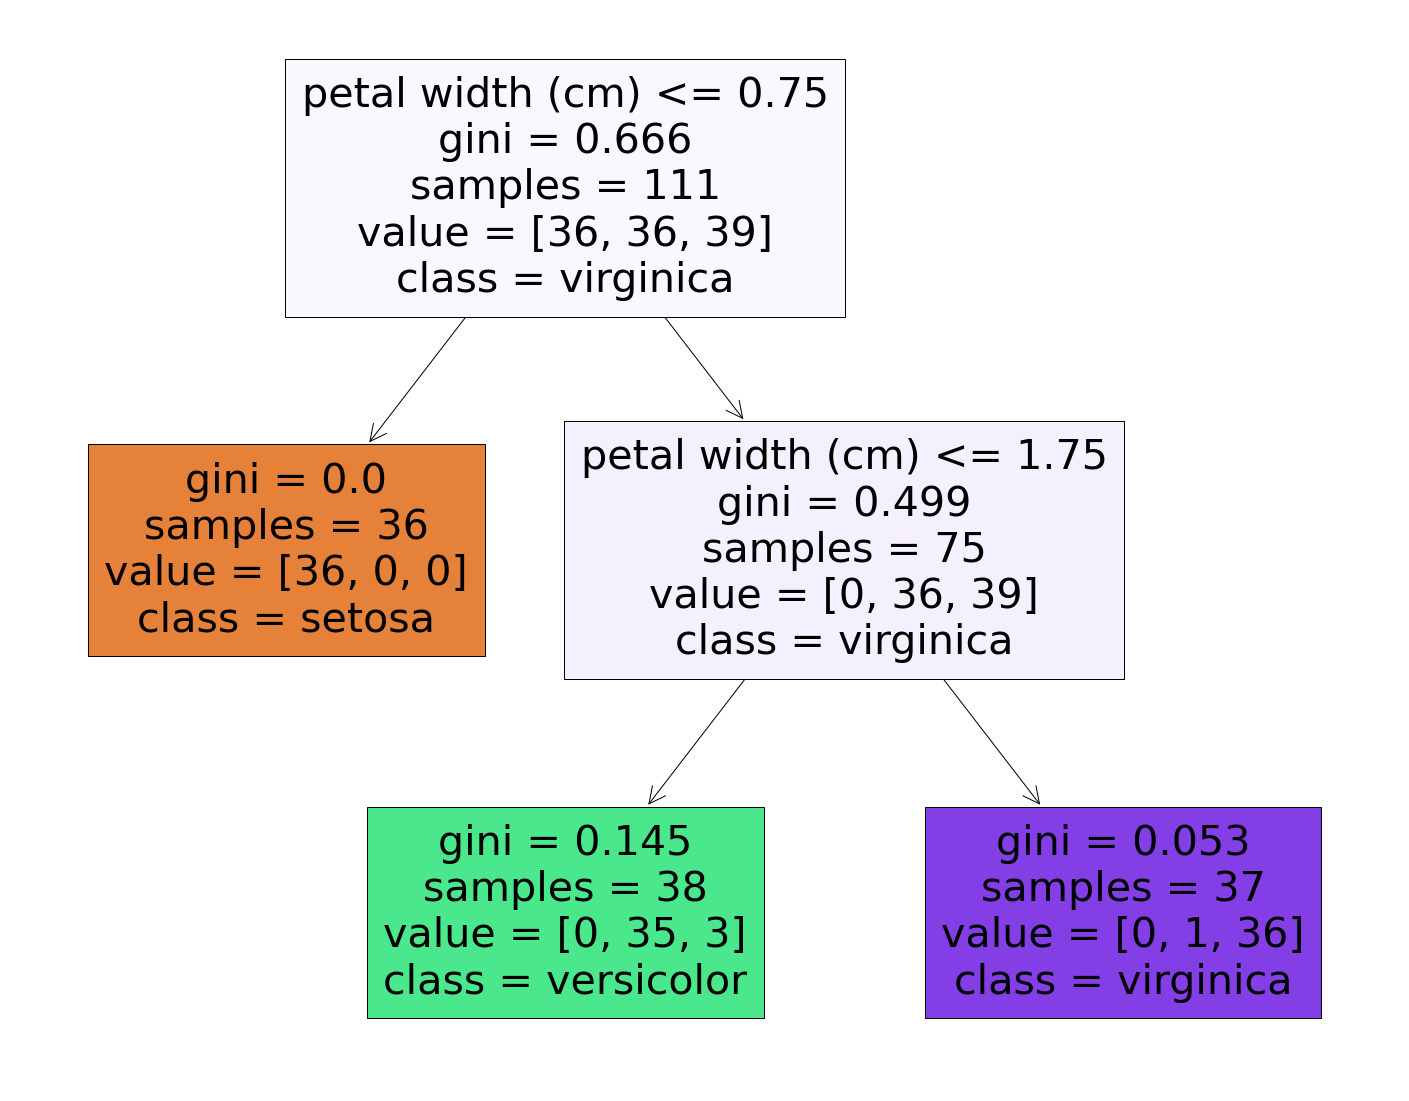

In [ ]:

fig = plt.figure(figsize = (25 , 20))
tree1 = tree.plot_tree(clf, feature_names = df.feature_names, class_names = df.target_names, filled = True)

In [ ]:
fig.savefig("decision_tree.png") # save decision tree

## Plot Decision Tree with dtreeviz package

In [ ]:
iris = load_iris()
X = iris.data

y = iris.target

#Create decision Tree classifier object
clf = DecisionTreeClassifier(random_state = 0)

#Train model

model = clf.fit(X , y)

In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 51kB 3.4MB/s 
     |████████████████████████████████| 204.2MB 70kB/s 
     |████████████████████████████████| 204kB 42.5MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.2-cp36-none-any.whl size=52359 sha256=24d8bfaeabd8e4af68e22fc095b5e3ae3233c0d55112f2bae31cbd40fba9498b
  Stored in directory: /root/.cache/pip/wheels/6c/42/13/06bfd7ecac5313d2bea233a1e1165fec14a4d3680fa856db57
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=439900701923818fbf6ef01bfbb233a55362bfa101a2c028cc4cc083cdc727b6
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


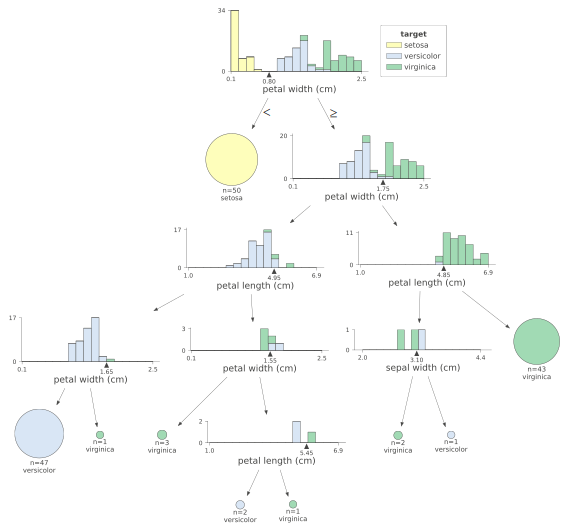

In [ ]:
from dtreeviz.trees import dtreeviz
viz=dtreeviz(clf, X,y,target_name = "target", feature_names = iris.feature_names, class_names = list(iris.target_names))

viz

In [ ]:
viz.save("decision_tree.svg") # save decision tree